In [21]:
import pandas as pd


In [22]:
df= pd.read_csv("HDFS_2k.log_structured.csv")

df.head()

,LineId,Date,Time,Pid,Level,Component,Content,EventId,EventTemplate
0,1,81109,203615,148,INFO,dfs.DataNode$PacketResponder,PacketResponder 1 for block blk_38865049064139...,E10,PacketResponder <*> for block blk_<*> terminating
1,2,81109,203807,222,INFO,dfs.DataNode$PacketResponder,PacketResponder 0 for block blk_-6952295868487...,E10,PacketResponder <*> for block blk_<*> terminating
2,3,81109,204005,35,INFO,dfs.FSNamesystem,BLOCK* NameSystem.addStoredBlock: blockMap upd...,E6,BLOCK* NameSystem.addStoredBlock: blockMap upd...
3,4,81109,204015,308,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_82291938032499...,E10,PacketResponder <*> for block blk_<*> terminating
4,5,81109,204106,329,INFO,dfs.DataNode$PacketResponder,PacketResponder 2 for block blk_-6670958622368...,E10,PacketResponder <*> for block blk_<*> terminating


In [23]:
df.shape

(2000, 9)

In [24]:
df["Level"].value_counts()

Level
INFO    1920
WARN      80
Name: count, dtype: int64

In [25]:
df["Component"].value_counts()

Component
dfs.FSNamesystem                659
dfs.DataNode$PacketResponder    603
dfs.DataNode$DataXceiver        454
dfs.FSDataset                   263
dfs.DataBlockScanner             20
dfs.DataNode                      1
Name: count, dtype: int64

In [26]:
df.dtypes

LineId           int64
Date             int64
Time             int64
Pid              int64
Level              str
Component          str
Content            str
EventId            str
EventTemplate      str
dtype: object

In [27]:
df["Date_str"] = df["Date"].astype(str).str.zfill(6)
df["Time_str"] = df["Time"].astype(str).str.zfill(6)

In [28]:
df["timestamp"] = pd.to_datetime(
    df["Date_str"] + " " + df["Time_str"],
    format="%y%m%d %H%M%S"
)

df[["Date", "Time", "timestamp"]].head()

,Date,Time,timestamp
0,81109,203615,2008-11-09 20:36:15
1,81109,203807,2008-11-09 20:38:07
2,81109,204005,2008-11-09 20:40:05
3,81109,204015,2008-11-09 20:40:15
4,81109,204106,2008-11-09 20:41:06


In [29]:
df["timestamp"].min(), df["timestamp"].max()

(Timestamp('2008-11-09 20:36:15'), Timestamp('2008-11-11 10:20:17'))

In [30]:
df= df.set_index("timestamp")

In [31]:
warn_df = df[df["Level"] == "WARN"]

In [32]:
warn_df.shape

(80, 11)

In [33]:
warn_counts = warn_df.resample("5min").size()

In [34]:
warn_counts.head(10)

timestamp
2008-11-09 21:40:00    2
2008-11-09 21:45:00    2
2008-11-09 21:50:00    2
2008-11-09 21:55:00    1
2008-11-09 22:00:00    2
2008-11-09 22:05:00    0
2008-11-09 22:10:00    2
2008-11-09 22:15:00    0
2008-11-09 22:20:00    3
2008-11-09 22:25:00    1
Freq: 5min, dtype: int64

<Axes: title={'center': 'WARN count per 5-minute window'}, xlabel='timestamp'>

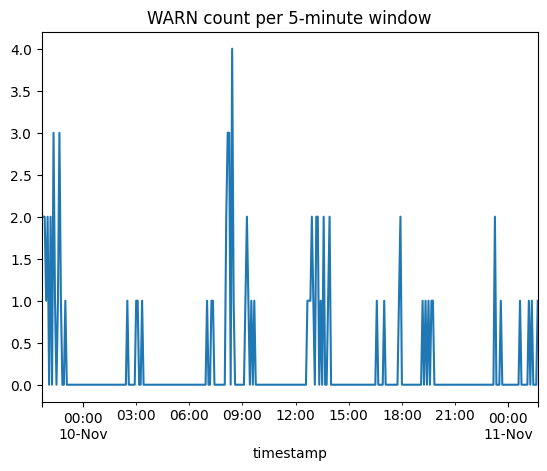

In [35]:
warn_counts.plot(title="WARN count per 5-minute window")

In [36]:
warn_counts.sort_values(ascending=False).head(5)

timestamp
2008-11-10 08:25:00    4
2008-11-10 08:10:00    3
2008-11-10 08:15:00    3
2008-11-09 22:20:00    3
2008-11-09 22:40:00    3
dtype: int64

In [37]:
top_window = warn_counts.idxmax()
top_window

Timestamp('2008-11-10 08:25:00')

In [38]:
window_logs = df.loc[
    top_window : top_window + pd.Timedelta(minutes=5)
]

In [39]:
window_warns = window_logs[window_logs["Level"] == "WARN"]

In [40]:
window_warns[["Component", "Content", "EventTemplate"]]

,Component,Content,EventTemplate
timestamp,,,
2008-11-10 08:27:02,dfs.DataNode$DataXceiver,10.250.15.198:50010:Got exception while servin...,<*>:<*>:Got exception while serving blk_<*> to...
2008-11-10 08:27:06,dfs.DataNode$DataXceiver,10.251.198.33:50010:Got exception while servin...,<*>:<*>:Got exception while serving blk_<*> to...
2008-11-10 08:27:37,dfs.DataNode$DataXceiver,10.250.19.227:50010:Got exception while servin...,<*>:<*>:Got exception while serving blk_<*> to...
2008-11-10 08:29:54,dfs.DataNode$DataXceiver,10.251.70.112:50010:Got exception while servin...,<*>:<*>:Got exception while serving blk_<*> to...
